In [12]:
import os
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
import numpy as np
import h5py
import time
import nrrd
from voxnet.conn2d import map_to_surface

drive_path = os.path.join(os.getenv('HOME'), 'work/allen/data/sdk_new_100')

# When downloading 3D connectivity data volumes, what resolution do you want (in microns)?  
# Options are: 10, 25, 50, 100
resolution_um = 10

# Drop list criterion, in percent difference
volume_fraction = 20

# The manifest file is a simple JSON file that keeps track of all of
# the data that has already been downloaded onto the hard drives.
# If you supply a relative path, it is assumed to be relative to your
# current working directory.
manifest_file = os.path.join(drive_path, "manifest.json")

# Start processing data
mcc = MouseConnectivityCache(manifest_file = manifest_file,
                             resolution = resolution_um)
ontology = mcc.get_ontology()
# Injection structure of interest
isocortex = ontology['Isocortex']

# open up a pandas dataframe of all of the experiments
experiments = mcc.get_experiments(dataframe = True, 
                                  injection_structure_ids = [isocortex['id'].values[0]], 
                                  cre = False)
print "%d total experiments" % len(experiments)

view_paths_fn = os.path.join(os.getenv('HOME'), 'work/allen/data/TopView/top_view_paths_10.h5')
view_paths_file = h5py.File(view_paths_fn, 'r')
view_lut = view_paths_file['view lookup'][:]
view_paths = view_paths_file['paths'][:]
view_paths_file.close()

## Compute size of each path to convert path averages to sums
norm_lut = np.zeros(view_lut.shape, dtype=int)
ind = np.where(view_lut != -1)
ind = zip(ind[0], ind[1])
for curr_ind in ind:
    curr_path_id = view_lut[curr_ind]
    curr_path = view_paths[curr_path_id, :]
    norm_lut[curr_ind] = np.sum(curr_path > 0)

t0 = time.time()
expt_drop_list = []
full_vols = []
flat_vols = []

/home/kamdh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:27: VisibleDeprecationWarning: Function get_ontology is deprecated. Use get_structure_tree instead.


126 total experiments


In [13]:
eid = experiments.iloc[5].id
row = experiments.iloc[5]
print eid
print row

180916954
gender                                                                   M
id                                                               180916954
injection-coordinates                                   [4800, 1220, 5930]
injection-structures     [{u'abbreviation': u'ACAd', u'color': u'40A666...
product-id                                                               5
strain                                                            C57BL/6J
structure-abbrev                                                       MOs
structure-color                                                     1F9D5A
structure-id                                                           993
structure-name                                        Secondary motor area
transgenic-line                                                           
Name: 180916954, dtype: object


In [14]:
    data_dir = os.path.join(os.getenv('HOME'),
                            "work/allen/data/sdk_new_100/experiment_%d/" % eid)
    # get and remap injection data
    print "getting injection density"
    in_d, in_info = mcc.get_injection_density(eid)
    print "mapping to surface"
    in_d_s = map_to_surface(in_d, view_lut, view_paths, scale = resolution_um/10., fun=np.mean)
    flat_vol = np.nansum(in_d_s * norm_lut) * (10./1000.)**3
    flat_vols.append(flat_vol)
    full_vol = np.nansum(in_d) * (10./1000.)**3
    full_vols.append(full_vol)


getting injection density
mapping to surface


In [15]:
expt_union = mcc.get_experiment_structure_unionizes(eid, hemisphere_ids = [2], is_injection = True,
                                                        structure_ids = [ontology['grey']['id'].values[0]])

In [16]:
flat_vols

[0.89908089262803303]

In [17]:
full_vols

[0.51017865625000014]

In [18]:
full_vol2 = float(expt_union['projection_volume'])
print expt_union
print full_vol2

      hemisphere_id         id  is_injection  max_voxel_density  max_voxel_x  \
2206              2  533667735          True                1.0         4800   

      max_voxel_y  max_voxel_z  normalized_projection_volume  \
2206         1220         5930                      0.991312   

      projection_density  projection_energy  projection_intensity  \
2206            0.999986            12435.6               12435.8   

      projection_volume  experiment_id  structure_id  sum_pixel_intensity  \
2206             0.5557      180916954             8         5.641290e+12   

       sum_pixels  sum_projection_pixel_intensity  sum_projection_pixels  \
2206  453639000.0                    5.641280e+12            453632000.0   

        volume  
2206  0.555708  
0.5557


In [19]:
print np.nansum(in_d_s * norm_lut)

899080.892628


In [20]:
in_d_sum = map_to_surface(in_d, view_lut, view_paths, scale = resolution_um/10., fun=np.sum)
np.nansum(in_d_sum) * (10./1000.)**3

0.89908087500000011

In [21]:
print np.abs(flat_vol - full_vol)/full_vol*100
print np.abs(flat_vol - full_vol2)/full_vol2*100

76.2286370889
61.7924946244


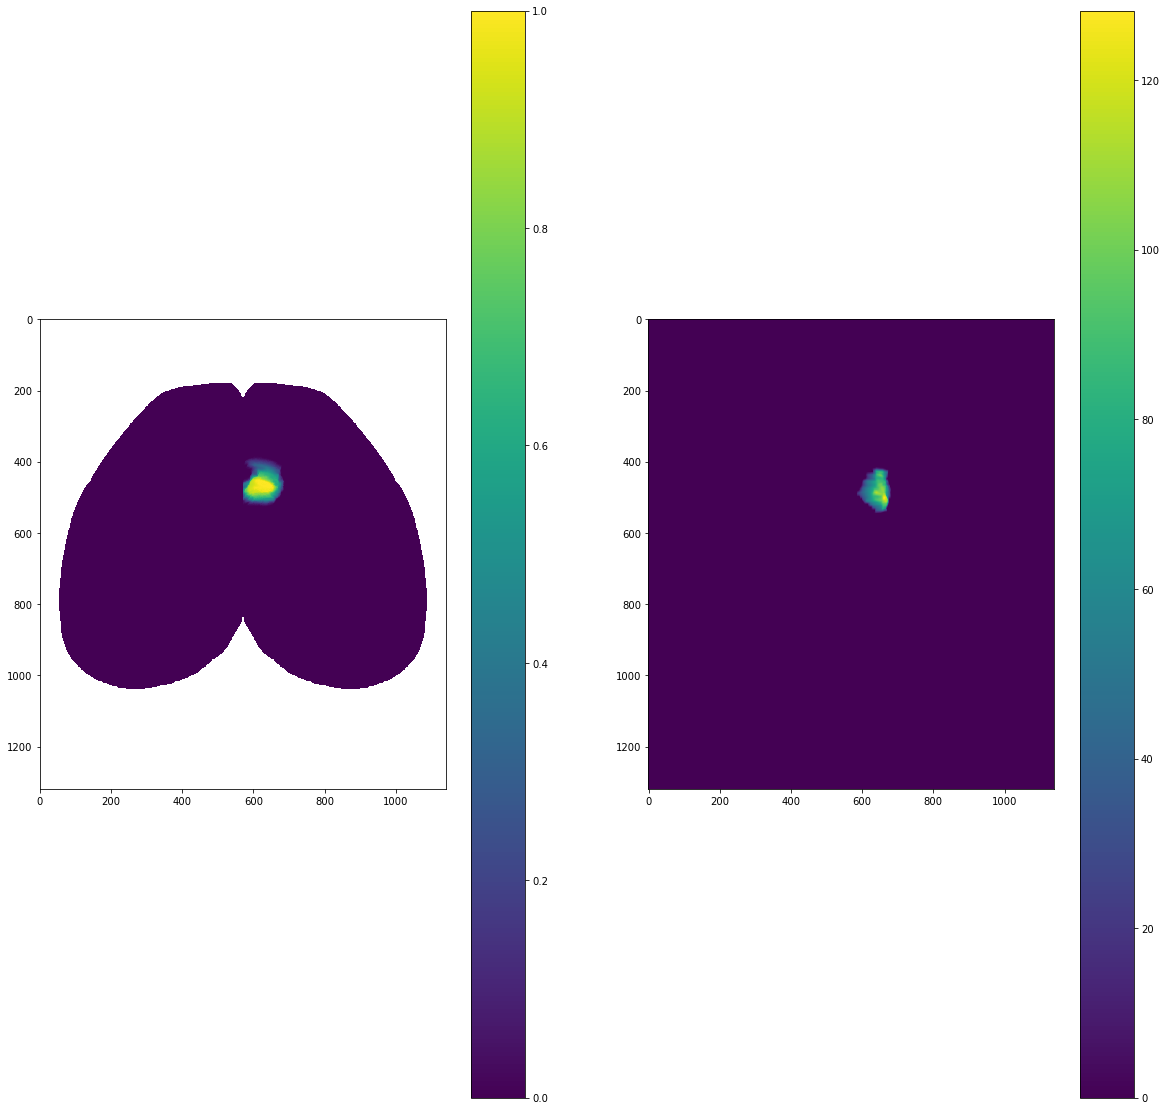

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
tmp = norm_lut.astype(float)
tmp[tmp == 0] = np.nan

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(121)
h = ax.imshow(in_d_s)
fig.colorbar(h)

a2 = fig.add_subplot(122)
h2 = a2.imshow(np.sum(in_d, axis=1))
fig.colorbar(h2)

In [20]:
experiments

,gender,id,injection-coordinates,injection-structures,product-id,strain,structure-abbrev,structure-color,structure-id,structure-name,transgenic-line
id,,,,,,,,,,,
180435652,M,180435652,"[7820, 4250, 9870]","[{u'abbreviation': u'TEa', u'color': u'15B0B3'...",5,C57BL/6J,ECT,0D9F91,895,Ectorhinal area,
180436360,M,180436360,"[4800, 4720, 8980]","[{u'abbreviation': u'AId', u'color': u'219866'...",5,C57BL/6J,VISC,11AD83,677,Visceral area,
180719293,M,180719293,"[3140, 3330, 7390]","[{u'abbreviation': u'AId', u'color': u'219866'...",5,C57BL/6J,MOs,1F9D5A,993,Secondary motor area,
180709942,M,180709942,"[3360, 3120, 7520]","[{u'abbreviation': u'MOp', u'color': u'1F9D5A'...",5,C57BL/6J,MOs,1F9D5A,993,Secondary motor area,
180917660,M,180917660,"[5570, 4540, 9540]","[{u'abbreviation': u'AIp', u'color': u'219866'...",5,C57BL/6J,VISC,11AD83,677,Visceral area,
180916954,M,180916954,"[4800, 1220, 5930]","[{u'abbreviation': u'ACAd', u'color': u'40A666...",5,C57BL/6J,MOs,1F9D5A,993,Secondary motor area,
100141780,M,100141780,"[4070, 2600, 7500]","[{u'abbreviation': u'MOp', u'color': u'1F9D5A'...",5,C57BL/6J,MOp,1F9D5A,985,Primary motor area,
180720175,M,180720175,"[5710, 670, 6420]","[{u'abbreviation': u'SSp-ll', u'color': u'1880...",5,C57BL/6J,MOp,1F9D5A,985,Primary motor area,
180717881,M,180717881,"[4580, 3610, 8670]","[{u'abbreviation': u'SSp-m', u'color': u'18806...",5,C57BL/6J,SSp-m,188064,345,"Primary somatosensory area, mouth",
